In [144]:
# -*- coding: utf-8 -*-

# This code presents a simple implementation of Physics-Informed
# Neural Networks (PINNs) as a collocation method. -- <50 lines of PINNS--

# In this 1D example, we utilize Keras for constructing neural networks
# and JAX in the backend.


import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import os
from PINN1D_keras import make_loss_model, make_special_model
os.environ["KERAS_BACKEND"] = "jax"

import keras


# Set the random seed
np.random.seed(1234)
keras.utils.set_random_seed(1234)

dtype='float64' # double precision set to default in the SCR functions
jax.config.update("jax_enable_x64", True)
keras.backend.set_floatx(dtype)

In [184]:
# Number of neurons per hidden layer in the neural network
nn = int(2**5)

# Number of training iterations
iterations = 10000

# Initialize the neural network model for the approximate solution
model = make_special_model(nn)

theta_init = model(jnp.array([1]))


Time to solve:  0.04120182991027832


C:\Users\itapi\AppData\Local\Temp\ipykernel_5928\534682524.py:18: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Dense', 'Sparse')


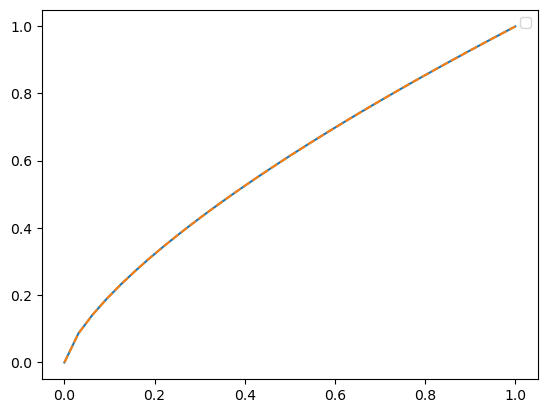

In [192]:
from Laplace_JAXSparse import solve as solve_sparse
from Laplace_JAXDense import solve as solve_dense
import time

start_time = time.time()
init_coords, o_sparse = solve_sparse(theta_init)
end_time = time.time()

print("Time to solve: ", end_time - start_time)

start_time = time.time()
init_coords, o_dense = solve_dense(theta_init)
end_time = time.time()

plt.figure()
plt.plot(init_coords, o_dense)
plt.plot(init_coords, o_sparse, '--')
plt.legend('Dense', 'Sparse')

In [191]:
o_sparse